Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### We have choosen to use gdrive for storing CNN image datasets, and took actions to read the data.

### Importing all the important libraries

In [1]:
import pathlib
from glob import glob
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
data_dir_train = pathlib.Path("/content/gdrive/My Drive/Colab Notebooks/Skin_Cancer/Train")
data_dir_test = pathlib.Path('/content/gdrive/My Drive/Colab Notebooks/Skin_Cancer/Test')

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


Pathlist of all the dataframes required to populate the dataframe.

In [5]:
# getting the exact paths of each image in train data folder
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
print(path_list)

['/content/gdrive/My Drive/Colab Notebooks/Skin_Cancer/Train/vascular lesion/ISIC_0024475.jpg', '/content/gdrive/My Drive/Colab Notebooks/Skin_Cancer/Train/vascular lesion/ISIC_0025578.jpg', '/content/gdrive/My Drive/Colab Notebooks/Skin_Cancer/Train/vascular lesion/ISIC_0026163.jpg', '/content/gdrive/My Drive/Colab Notebooks/Skin_Cancer/Train/vascular lesion/ISIC_0025249.jpg', '/content/gdrive/My Drive/Colab Notebooks/Skin_Cancer/Train/vascular lesion/ISIC_0025425.jpg', '/content/gdrive/My Drive/Colab Notebooks/Skin_Cancer/Train/vascular lesion/ISIC_0025677.jpg', '/content/gdrive/My Drive/Colab Notebooks/Skin_Cancer/Train/vascular lesion/ISIC_0024867.jpg', '/content/gdrive/My Drive/Colab Notebooks/Skin_Cancer/Train/vascular lesion/ISIC_0025452.jpg', '/content/gdrive/My Drive/Colab Notebooks/Skin_Cancer/Train/vascular lesion/ISIC_0025612.jpg', '/content/gdrive/My Drive/Colab Notebooks/Skin_Cancer/Train/vascular lesion/ISIC_0025628.jpg', '/content/gdrive/My Drive/Colab Notebooks/Skin_Ca

List of skin cancer classnames

In [6]:
# getting the classes of each image dataset based on the folder name as per the skin cancer name
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train,'*', '*.jpg'))]
print(lesion_list)

['vascular lesion', 'vascular lesion', 'vascular lesion', 'vascular lesion', 'vascular lesion', 'vascular lesion', 'vascular lesion', 'vascular lesion', 'vascular lesion', 'vascular lesion', 'vascular lesion', 'vascular lesion', 'vascular lesion', 'vascular lesion', 'vascular lesion', 'vascular lesion', 'vascular lesion', 'vascular lesion', 'vascular lesion', 'vascular lesion', 'vascular lesion', 'vascular lesion', 'vascular lesion', 'vascular lesion', 'vascular lesion', 'vascular lesion', 'vascular lesion', 'vascular lesion', 'vascular lesion', 'vascular lesion', 'vascular lesion', 'vascular lesion', 'vascular lesion', 'vascular lesion', 'vascular lesion', 'vascular lesion', 'vascular lesion', 'vascular lesion', 'vascular lesion', 'vascular lesion', 'vascular lesion', 'vascular lesion', 'vascular lesion', 'vascular lesion', 'vascular lesion', 'vascular lesion', 'vascular lesion', 'vascular lesion', 'vascular lesion', 'vascular lesion', 'vascular lesion', 'vascular lesion', 'vascular l

In [7]:
# creating a dictionary to prepare a dataframe
dataframe_dict = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict.items()),columns = ['Path','Label'])

In [8]:
original_df.head()

,Path,Label
0,/content/gdrive/My Drive/Colab Notebooks/Skin_...,vascular lesion
1,/content/gdrive/My Drive/Colab Notebooks/Skin_...,vascular lesion
2,/content/gdrive/My Drive/Colab Notebooks/Skin_...,vascular lesion
3,/content/gdrive/My Drive/Colab Notebooks/Skin_...,vascular lesion
4,/content/gdrive/My Drive/Colab Notebooks/Skin_...,vascular lesion


In [9]:
original_df['Label'].value_counts()

Label
pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: count, dtype: int64

### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [10]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [11]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory=data_dir_train,
    labels='inferred',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="training"
)

Found 2739 files belonging to 9 classes.
Using 2192 files for training.


In [12]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory=data_dir_train,
    labels='inferred',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="validation"
)

Found 2739 files belonging to 9 classes.
Using 547 files for validation.


In [13]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

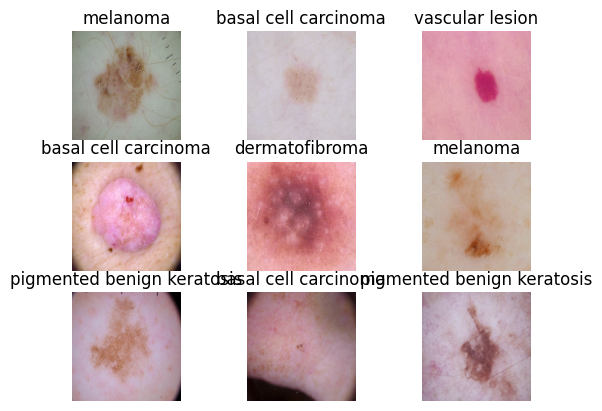

In [14]:
import matplotlib.pyplot as plt

k = 0
for image_batch, label_batch in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(image_batch[k].numpy().astype("uint8"))
        plt.title(class_names[label_batch[k]])
        plt.axis("off")
        k += 1

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [15]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the 1st model
Create first CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [16]:
model = Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
# Adding First conv layer
model.add(layers.Conv2D(16, 3, padding='same', activation='relu'))
# Adding Max Pooling layer
model.add(layers.MaxPooling2D())
# Adding 2nd Conv layer
model.add(layers.Conv2D(32, 3, padding='same', activation='relu'))
# Adding 2nd max pool layer
model.add(layers.MaxPooling2D())
# Adding 3rd Conv layer
model.add(layers.Conv2D(64, 3, padding='same', activation='relu'))
# Adding 3rd max pool layer
model.add(layers.MaxPooling2D())
# Adding Flatten
model.add(layers.Flatten())
# Adding 1st dense layer
model.add(layers.Dense(128, activation='relu'))
# Adding 2nd dense layer
model.add(layers.Dense(9, activation='softmax'))

### Compile the model
Choose an appropirate optimiser and loss function for model training

In [17]:
### We have choosen 'adam' as an appropirate optimiser and 'sparse_categorical_crossentropy' as loss function.
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

### Train the model

In [19]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
69/69 [==============================] - 338s 1s/step - loss: 1.8969 - accuracy: 0.3303 - val_loss: 1.8258 - val_accuracy: 0.3492
Epoch 2/20
69/69 [==============================] - 1s 21ms/step - loss: 1.6104 - accuracy: 0.4348 - val_loss: 1.4052 - val_accuracy: 0.4991
Epoch 3/20
69/69 [==============================] - 1s 20ms/step - loss: 1.3801 - accuracy: 0.5365 - val_loss: 1.3129 - val_accuracy: 0.5576
Epoch 4/20
69/69 [==============================] - 1s 20ms/step - loss: 1.2469 - accuracy: 0.5821 - val_loss: 1.2893 - val_accuracy: 0.5740
Epoch 5/20
69/69 [==============================] - 1s 20ms/step - loss: 1.1464 - accuracy: 0.6077 - val_loss: 1.3406 - val_accuracy: 0.5448
Epoch 6/20
69/69 [==============================] - 1s 20ms/step - loss: 1.0631 - accuracy: 0.6341 - val_loss: 1.2972 - val_accuracy: 0.5704
Epoch 7/20
69/69 [==============================] - 2s 22ms/step - loss: 1.0373 - accuracy: 0.6373 - val_loss: 1.4104 - val_accuracy: 0.5539
Epoch 8/20
69

### Visualizing training results

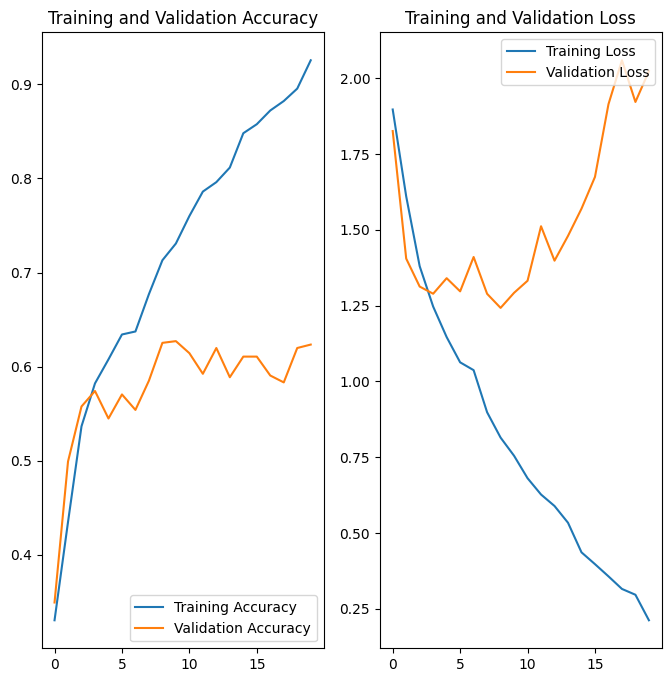

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Findings from the first model

Based on the graph, it clearly shows that the training accuracy is around 90% which clearly shows signs of model overfitting, and the validation accuracy is very less.
The reason for this might be the lack of images for validation, as CNN models required a lots of images to process.

In [21]:
# To handle overfitting, we can use following strategies to do Data Agumentation, like random flip, random rotation and random zoom.
data_agumentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.2)
])

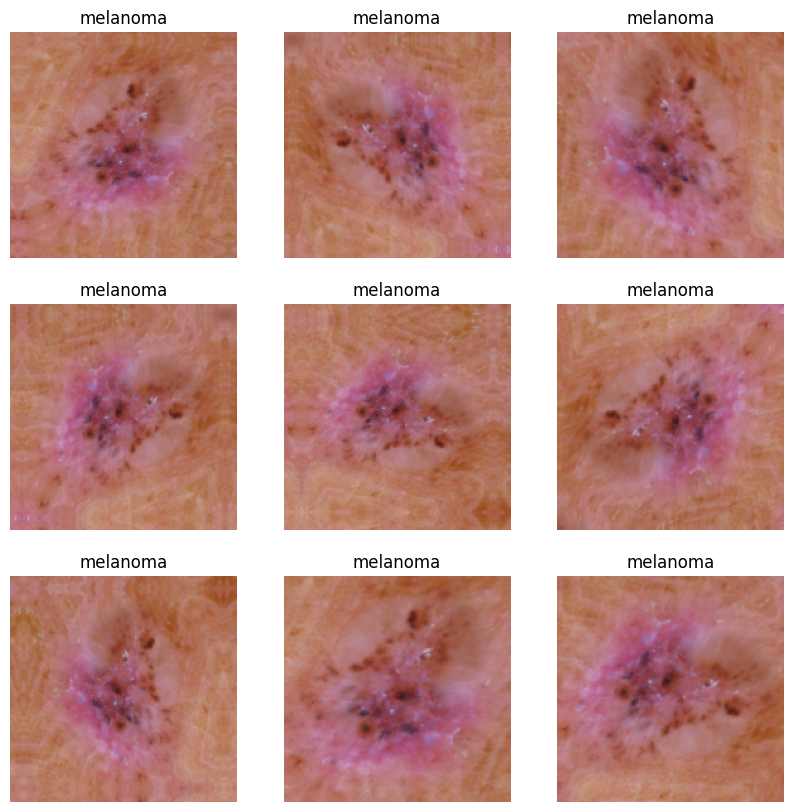

In [22]:
# Plotting image to validate the agumentation strategy works for one instance of training image
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_agumentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")
        plt.title(class_names[label_batch[0]])
plt.show()

### Create the 2nd model, compile and train the model


In [23]:
model = Sequential()
# Adding data agumentation layer
model.add(data_agumentation)
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
# Adding First conv layer
model.add(layers.Conv2D(16, 3, padding='same', activation='relu'))
# Adding Max Pooling layer
model.add(layers.MaxPooling2D())
# Adding 2nd Conv layer
model.add(layers.Conv2D(32, 3, padding='same', activation='relu'))
# Adding 2nd max pool layer
model.add(layers.MaxPooling2D())
# Adding 3rd Conv layer
model.add(layers.Conv2D(64, 3, padding='same', activation='relu'))
# Adding 3rd max pool layer
model.add(layers.MaxPooling2D())
# Adding Flatten
model.add(layers.Flatten())
# Adding 1st dense layer
model.add(layers.Dense(128, activation='relu'))
# Adding 2nd dense layer
model.add(layers.Dense(9, activation='softmax'))

### Compiling the model

In [24]:
### We have choosen an 'adam' as appropirate optimiser and 'sparse_categorical_crossentropy' as loss function
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Training the model

In [25]:
## training the model with 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
69/69 [==============================] - 5s 26ms/step - loss: 1.9241 - accuracy: 0.3353 - val_loss: 1.7489 - val_accuracy: 0.3821
Epoch 2/20
69/69 [==============================] - 2s 22ms/step - loss: 1.5413 - accuracy: 0.4557 - val_loss: 1.4079 - val_accuracy: 0.5046
Epoch 3/20
69/69 [==============================] - 2s 22ms/step - loss: 1.4001 - accuracy: 0.5137 - val_loss: 1.4418 - val_accuracy: 0.4808
Epoch 4/20
69/69 [==============================] - 2s 22ms/step - loss: 1.3069 - accuracy: 0.5538 - val_loss: 1.4086 - val_accuracy: 0.4954
Epoch 5/20
69/69 [==============================] - 2s 22ms/step - loss: 1.2898 - accuracy: 0.5557 - val_loss: 1.4317 - val_accuracy: 0.4881
Epoch 6/20
69/69 [==============================] - 2s 23ms/step - loss: 1.2732 - accuracy: 0.5630 - val_loss: 1.2753 - val_accuracy: 0.5868
Epoch 7/20
69/69 [==============================] - 2s 24ms/step - loss: 1.2712 - accuracy: 0.5684 - val_loss: 1.4727 - val_accuracy: 0.5174
Epoch 8/20
69

### Visualizing the results

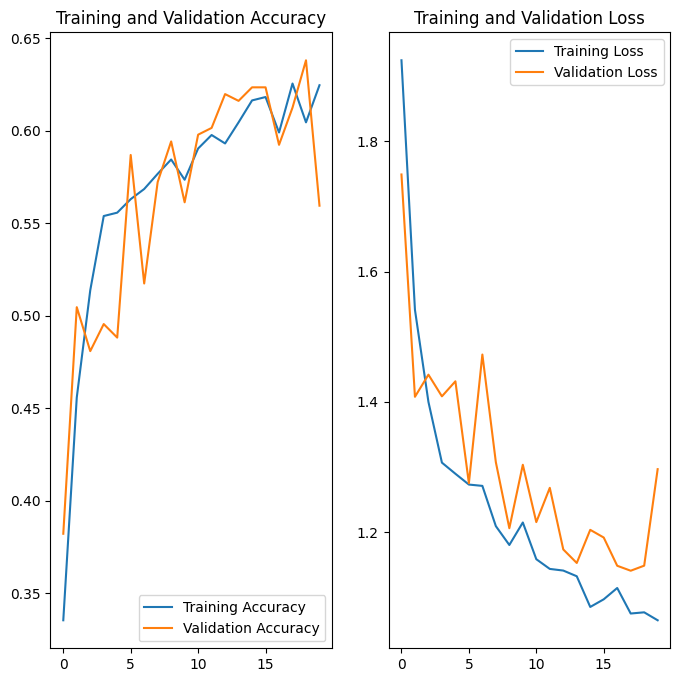

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

There has been a considerable improvement now as compared to the previous model as we can see from the train and validation accuracy that the model overfitting has been handled, but the model performance is not so good only 59% train and 54% validation accuracy.
### One reason could be class imbalance

#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [27]:
# creating the dictionary and dataframe of original train data to plot a bar graph to check the class imbalance
image_dict = {}
for classname in class_names:
    image_dict[classname] = len(list(data_dir_train.glob(classname+'/*.jpg')))
print(image_dict)

{'actinic keratosis': 114, 'basal cell carcinoma': 376, 'dermatofibroma': 95, 'melanoma': 438, 'nevus': 357, 'pigmented benign keratosis': 462, 'seborrheic keratosis': 77, 'squamous cell carcinoma': 181, 'vascular lesion': 139}


In [28]:
# creating dataframe containing count of images per class
df = pd.DataFrame()
counts = list(image_dict.values())
df['class'] = class_names
df['count'] = counts

In [29]:
df.head(10)

,class,count
0,actinic keratosis,114
1,basal cell carcinoma,376
2,dermatofibroma,95
3,melanoma,438
4,nevus,357
5,pigmented benign keratosis,462
6,seborrheic keratosis,77
7,squamous cell carcinoma,181
8,vascular lesion,139


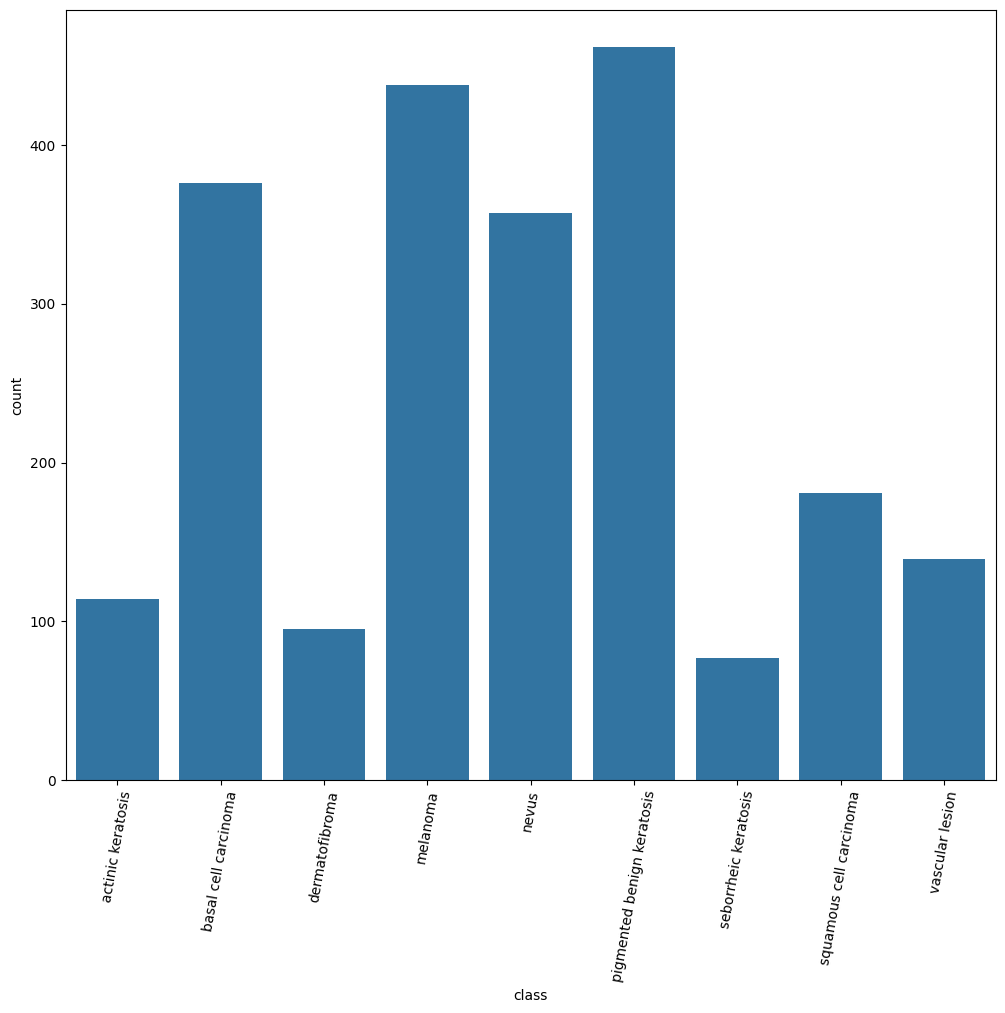

In [30]:
# Plotting the bar graph for each class
plt.figure(figsize=(12, 10))
sns.barplot(x = df['class'], y = df['count'], data = df)
plt.xticks(rotation=80)
plt.show()

Based on the above analysis it seems following points makes sense:

* *Which class has the least number of samples?*

As per the graph above **seborrheic keratosis** class has the least number of samples, which is **77**.

* *Which classes dominate the data in terms proportionate number of samples?*

Based on the bar diagram, it seems **pigmented benign keratosis, melanoma and basal cell carcinoma** are the top 3 classes with highest number of samples, and dominating the overall classes.

And it clearly shows as the issue is of Class reimbalance, and to resolve this issue we will use the Aguementor library to generate more images and then rebuild the model again.


#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [31]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [33]:
path_to_training_dataset='gdrive/MyDrive/Colab Notebooks/Skin_Cancer/Train/'
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(os.path.join(path_to_training_dataset + i))
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to gdrive/MyDrive/Colab Notebooks/Skin_Cancer/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x78ECA49DF880>: 100%|██████████| 500/500 [00:23<00:00, 20.97 Samples/s]


Initialised with 376 image(s) found.
Output directory set to gdrive/MyDrive/Colab Notebooks/Skin_Cancer/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x78ECA49DF610>: 100%|██████████| 500/500 [00:25<00:00, 19.45 Samples/s]


Initialised with 95 image(s) found.
Output directory set to gdrive/MyDrive/Colab Notebooks/Skin_Cancer/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x78ECBB9A0400>: 100%|██████████| 500/500 [00:18<00:00, 27.16 Samples/s]


Initialised with 438 image(s) found.
Output directory set to gdrive/MyDrive/Colab Notebooks/Skin_Cancer/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x78ED1810E710>: 100%|██████████| 500/500 [01:17<00:00,  6.41 Samples/s]


Initialised with 357 image(s) found.
Output directory set to gdrive/MyDrive/Colab Notebooks/Skin_Cancer/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x78ED1827B8B0>: 100%|██████████| 500/500 [01:23<00:00,  5.99 Samples/s]


Initialised with 462 image(s) found.
Output directory set to gdrive/MyDrive/Colab Notebooks/Skin_Cancer/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x78ECBB923B80>: 100%|██████████| 500/500 [00:20<00:00, 24.98 Samples/s]


Initialised with 77 image(s) found.
Output directory set to gdrive/MyDrive/Colab Notebooks/Skin_Cancer/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x78ED182B3190>: 100%|██████████| 500/500 [00:38<00:00, 13.00 Samples/s]


Initialised with 181 image(s) found.
Output directory set to gdrive/MyDrive/Colab Notebooks/Skin_Cancer/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x78ECA4961D20>: 100%|██████████| 500/500 [00:19<00:00, 26.14 Samples/s]


Initialised with 139 image(s) found.
Output directory set to gdrive/MyDrive/Colab Notebooks/Skin_Cancer/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x78ED1827BFD0>: 100%|██████████| 500/500 [00:19<00:00, 25.48 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [34]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

5000


### Lets see the distribution of augmented data after adding new images to the original training data.

In [35]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['/content/gdrive/My Drive/Colab Notebooks/Skin_Cancer/Train/vascular lesion/output/vascular lesion_original_ISIC_0030275.jpg_b393a5bb-5620-404d-8680-64b1d1bcd760.jpg',
 '/content/gdrive/My Drive/Colab Notebooks/Skin_Cancer/Train/vascular lesion/output/vascular lesion_original_ISIC_0027888.jpg_fd946c2c-d68e-4073-b667-6028d914c555.jpg',
 '/content/gdrive/My Drive/Colab Notebooks/Skin_Cancer/Train/vascular lesion/output/vascular lesion_original_ISIC_0033092.jpg_63a8d88e-8c58-414b-95db-4ed13f6b6a88.jpg',
 '/content/gdrive/My Drive/Colab Notebooks/Skin_Cancer/Train/vascular lesion/output/vascular lesion_original_ISIC_0033762.jpg_ccfba055-1288-451d-87be-d0186a6ce505.jpg',
 '/content/gdrive/My Drive/Colab Notebooks/Skin_Cancer/Train/vascular lesion/output/vascular lesion_original_ISIC_0031706.jpg_3c70b11c-eac6-4446-9fc3-ae493476b2c7.jpg',
 '/content/gdrive/My Drive/Colab Notebooks/Skin_Cancer/Train/vascular lesion/output/vascular lesion_original_ISIC_0032715.jpg_d92b4042-ac02-43da-a04e-9faad

In [36]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',


In [37]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [40]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = pd.concat([original_df, df2])

In [41]:
new_df['Label'].value_counts()

Label
melanoma                      1438
pigmented benign keratosis     962
basal cell carcinoma           876
nevus                          857
squamous cell carcinoma        681
vascular lesion                639
actinic keratosis              614
dermatofibroma                 595
seborrheic keratosis           577
Name: count, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### Train the model on the data created using Augmentor

In [42]:
batch_size = 32
img_height = 180
img_width = 180

#### Create a training dataset

In [44]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 7239 files belonging to 9 classes.
Using 5792 files for training.


#### Create a validation dataset

In [45]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 7239 files belonging to 9 classes.
Using 1447 files for validation.


In [46]:
# checking the class names
class_names = train_ds.class_names
print(class_names)
num_classes = len(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [47]:
# Autotune
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

#### Create your model (make sure to include normalization)

In [48]:
model = Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
# Adding First conv layer
model.add(layers.Conv2D(16, 3, padding='same', activation='relu'))
# Adding Max Pooling layer
model.add(layers.MaxPooling2D())
model.add(layers.Dropout(0.25))
# Adding 2nd Conv layer
model.add(layers.Conv2D(32, 3, padding='same', activation='relu'))
# Adding 2nd max pool layer
model.add(layers.MaxPooling2D())
model.add(layers.Dropout(0.25))
# Adding 3rd Conv layer
model.add(layers.Conv2D(64, 3, padding='same', activation='relu'))
# Adding 3rd max pool layer
model.add(layers.MaxPooling2D())
model.add(layers.Dropout(0.25))
# Adding Flatten
model.add(layers.Flatten())
# Adding 1st dense layer
model.add(layers.Dense(128, activation='relu'))
# Adding 2nd dense layer
model.add(layers.Dense(9, activation='softmax'))

#### Compile the final model (Choose optimizer and loss function appropriately)

In [49]:
### We have choosen 'adam' as an appropirate optimiser and 'sparse_categorical_crossentropy' as loss function.
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [50]:
# model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 90, 90, 16)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                 

#### Train the final model

In [51]:
epochs = 30
## Your code goes here, use 50 epochs.
history =  model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
181/181 [==============================] - 52s 79ms/step - loss: 2.1877 - accuracy: 0.1922 - val_loss: 1.8915 - val_accuracy: 0.2495
Epoch 2/30
181/181 [==============================] - 5s 27ms/step - loss: 1.5779 - accuracy: 0.3945 - val_loss: 1.4745 - val_accuracy: 0.4713
Epoch 3/30
181/181 [==============================] - 5s 28ms/step - loss: 1.3486 - accuracy: 0.4921 - val_loss: 1.3599 - val_accuracy: 0.5024
Epoch 4/30
181/181 [==============================] - 5s 27ms/step - loss: 1.2458 - accuracy: 0.5309 - val_loss: 1.1846 - val_accuracy: 0.5701
Epoch 5/30
181/181 [==============================] - 5s 27ms/step - loss: 1.0901 - accuracy: 0.5881 - val_loss: 1.1049 - val_accuracy: 0.6075
Epoch 6/30
181/181 [==============================] - 5s 29ms/step - loss: 0.9729 - accuracy: 0.6295 - val_loss: 1.1213 - val_accuracy: 0.6026
Epoch 7/30
181/181 [==============================] - 5s 27ms/step - loss: 0.8627 - accuracy: 0.6894 - val_loss: 0.9367 - val_accuracy: 0.650

#### Visualize the model results

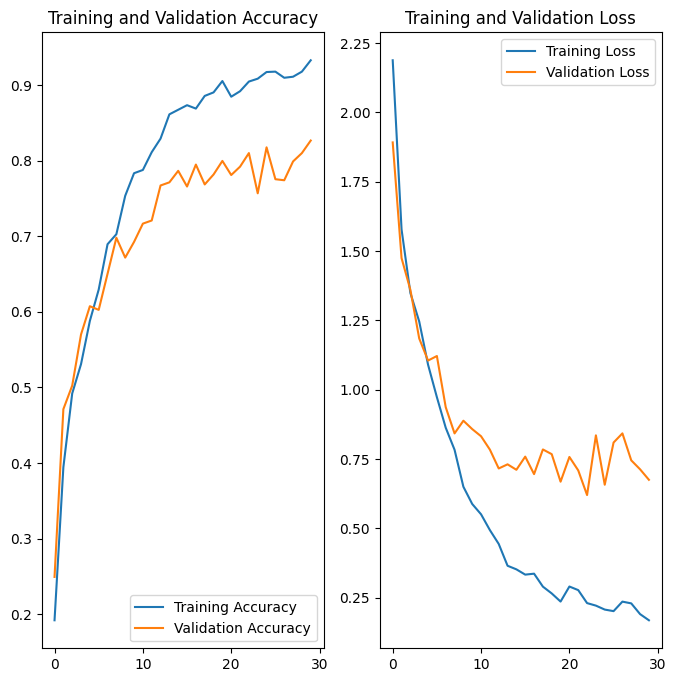

In [52]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Finally, we could handle both overfitting and class imbalance issue and the model performance has increased considerably.

**Train accuracy 93% and Validation accuracy 82%**

